In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
irisdata = pd.read_excel('Iris.xls')
irisdata.head()

,sepal length,sepal width,petal length,petal width,iris,Unnamed: 5,Unnamed: 6,sepal length.1,Unnamed: 8
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,Count,150.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,Minimum,4.300000
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,Maximum,7.900000
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,Mean,5.843333
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,Median,5.800000


In [5]:
#print(irisdata.describe())
cols = ['sepal length','sepal width','petal length','petal width','iris']
irisdata = irisdata[cols]
irisdata.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
%matplotlib inline

In [6]:
le = LabelEncoder()
le.fit(irisdata['iris'].astype(str))
irisdata['iris']=le.transform(irisdata['iris'].astype(str))
irisdata.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


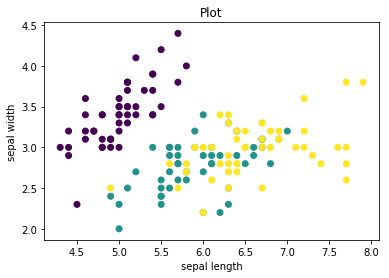

In [7]:
import matplotlib.pyplot as plt

jc = {'0':100,'1':170,'2':220}
g = irisdata['iris']
map(g,jc)
plt.scatter(irisdata['sepal length'],irisdata['sepal width'],c = g)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Plot')
plt.show()

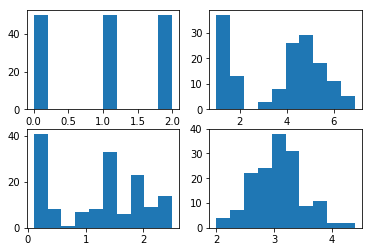

In [8]:
plt.subplot(221)
plt.hist(irisdata['iris'])
plt.subplot(222)
plt.hist(irisdata['petal length'])
plt.subplot(223)
plt.hist(irisdata['petal width'])
plt.subplot(224)
plt.hist(irisdata['sepal width'])
plt.show()

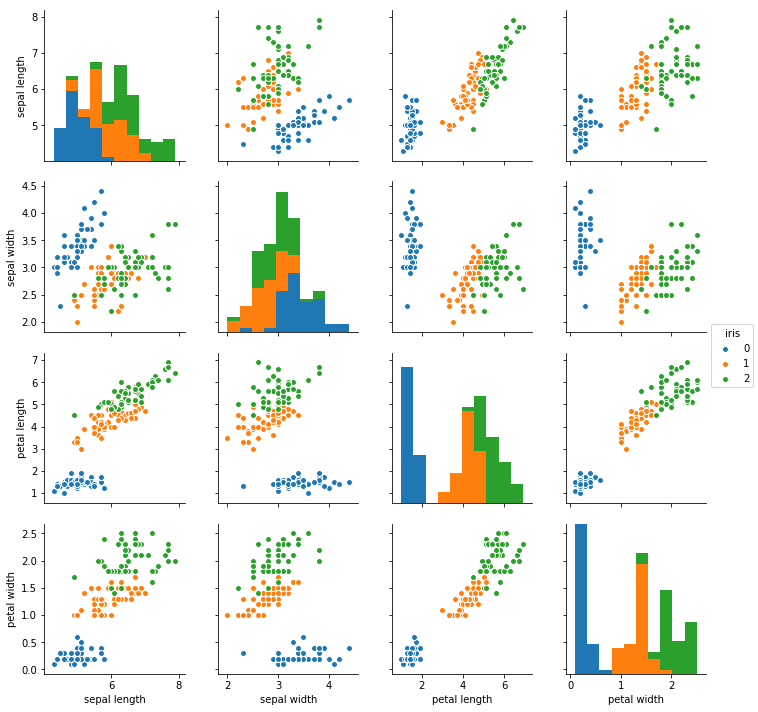

In [11]:
sns.pairplot(irisdata,hue="iris",vars = cols[0:4])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

In [61]:
x,x_t,y,y_t = train_test_split(irisdata[cols[0:4]],irisdata['iris'],test_size=0.2)

In [62]:
#LinearSVC() it uses one versus the rest..
tr = svm.LinearSVC()
tr.fit(x,y)
h = tr.predict(x_t)

cfm = confusion_matrix(y_t,h)
print(tr.score(x_t,y_t))
print(cfm)

0.9666666666666667
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [63]:
#RandomForestClassifier()
tr = RandomForestClassifier(n_estimators = 100)
tr.fit(x,y)
h = tr.predict(x_t)

cfm = confusion_matrix(y_t,h)
print(tr.score(x_t,y_t))
print(cfm)

0.9666666666666667
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [65]:
#DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()
tr.fit(x,y)
h = tr.predict(x_t)

cfm = confusion_matrix(y_t,h)
print(tr.score(x_t,y_t))
print(cfm)

0.9666666666666667
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


In [69]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

tr = KNeighborsClassifier()
tr.fit(x,y)
h = tr.predict(x_t)

cfm = confusion_matrix(y_t,h)
print(tr.score(x_t,y_t))
print(cfm)

1.0
[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
